# MRT from TSD data

- This mean residecne time is a weighted mean of TSD (or x):
$$
MRT = \frac{  \sum_{i\to n}^{n} TSD_{i}*W_{i}  }{\  sum_{i\to n}^{n}W_{i}     },
$$ 
where $W_i$ is the product of $diff_{i}$ and other weights such as volume, carbon mass or BA.

- we use the differences between time steps because that more reliably reproduces the 1/k MRT (see below) 
    - this is also more conservative (rather underestimating than overestimating)
    - Only works well if the step sizes are small $\rightarrow$ interpolations necessary

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.interpolate import interp1d
import sys
from classes import boundaries as bd
from classes import functions as fcy
from classes import snag_MTF_func as sg

plot_setup = bd.plot_setup()
params = {'mathtext.default':'regular'}
plt.rcParams.update(params)

%matplotlib inline

# Figure A3

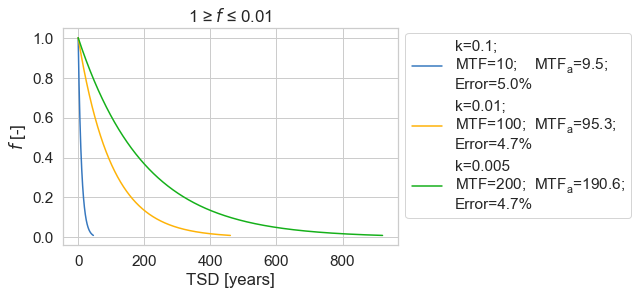

In [2]:
def func(x,k):
    return np.exp(-k*x)

rates = [0.1,0.01,0.005]

MTF_label = [';\nMTF=',';\nMTF=','\nMTF=']
MTFa_label = ['   $MTF_a$=',' $MTF_a$=',' $MTF_a$=']
err_label =['\nError=','\nError=','\nError=']
for r,rate in enumerate(rates):
    x = np.arange(0,10000,0.1)
    y = func(x,rate)
    noise = np.random.normal(0,0.02,len(x))



    ys = y
    xs = x
    ys[ys < 0.01] = np.nan
    xs = xs[~np.isnan(ys)]
    ys = ys[~np.isnan(ys)]
    yy = ys[1:]-ys[:-1]
    
    approximated_using1prc = round(sum(yy*xs[:-1])/sum(yy),1)
    err_prc = round(100-approximated_using1prc/(1/rate)*100,1)

    plt.plot(xs, ys, 
                label=('k='+str(rate)+MTF_label[r]+str(int(1/rate))+'; '+MTFa_label[r]+
                       str(approximated_using1prc)+';'+err_label[r]+str(err_prc)+'%')
               )
    plt.xlabel('TSD [years]')
    plt.ylabel('$\it{f}$ [-]')
plt.legend(bbox_to_anchor=(1,1.01),loc='upper left')
plt.title(r'1 ≥ $\it{f}$ ≤ 0.01')
plt.savefig('221115_error_assume_1prc_remain_when_all_gone.png',dpi=300, bbox_inches='tight')
plt.show()





# Figure A2

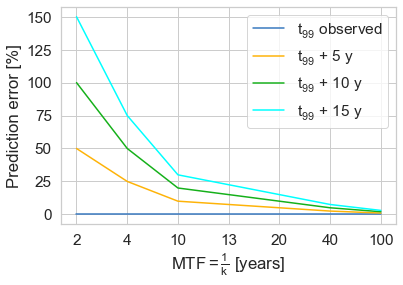

In [3]:
rates = [0.5,0.25,0.1,0.075,0.05,0.025,0.01]


MRT_list = [1/r for r in rates]
t_99     = [5/r for r in rates]
t_95     = [3/r for r in rates]


x        = np.arange(0,len(rates))
arr      = np.empty((6,len(rates)))
arr[0,:] = MRT_list

fig, ax = plt.subplots(1,1)
for t,tsd in enumerate(rates):

    arr[1,t] = 1/(5/t_99[t])
    arr[2,t] = 1/(5/(t_99[t]+5))
    arr[3,t] = 1/(5/(t_99[t]+10))
    arr[4,t] = 1/(5/(t_99[t]+15))
    arr[5,t] = 1/(5/(t_99[t]+25))


plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[1])/arr[0]*100, label='$t_{99}$ observed')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[2])/arr[0]*100, label='$t_{99}$ + 5 y')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[3])/arr[0]*100, label='$t_{99}$ + 10 y')
plt.plot(np.arange(0,(len(rates))), abs(arr[0]-arr[4])/arr[0]*100, label='$t_{99}$ + 15 y')


plt.ylabel('Prediction error [%]')
plt.xlabel(r'$MTF=\frac{1}{k}$ [years]')
ticks = ax.get_xticks()
plt.legend(bbox_to_anchor=(1,1))
ax.set_xticks(x, [str(int(1/r)) for r in rates])
#plt.xticks(rotation=45, ha='right')
plt.show()    